In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from scipy.stats import norm

## Explore the Data

In [2]:
PATH = '/home/disk/orca/adaley17/MLGEO2024_TC_Tracks_Intensity/data/ai_ready/'
AI_Ready_Path = '/home/disk/orca/adaley17/MLGEO2024_TC_Tracks_Intensity/data/ai_ready/'
ai_ready_file = 'ai_ready_SHIPS_data.csv'

ai_ready_data = pd.read_csv(PATH + ai_ready_file)

In [3]:
ai_ready_data.head()

,Original_Times,Code,Times,Daily_SST_Avg,Mid_Level_RH,Vert_Vel,Vshear,MSLP,Vmax,Latitude,Longitude
0,1982-06-02 12:00:00,AL011982,-12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1982-06-02 12:00:00,AL011982,-6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1982-06-02 12:00:00,AL011982,0.0,27.1,57.0,6.631183,15.227542,1005.0,10.28888,21.7,87.1
3,1982-06-02 12:00:00,AL011982,6.0,27.8,53.0,3.966363,15.536209,1004.0,12.86110,22.2,86.5
4,1982-06-02 12:00:00,AL011982,12.0,27.9,56.0,4.403641,15.330431,1003.0,15.43332,22.6,85.8


## Evaluating the Basic Satistics of the Data

In [4]:
ai_ready_data.describe()

,Times,Daily_SST_Avg,Mid_Level_RH,Vert_Vel,Vshear,MSLP,Vmax,Latitude,Longitude
count,318550.00000,203418.000000,177650.000000,177650.000000,177650.000000,201766.000000,203418.000000,203418.000000,203418.000000
mean,54.00000,27.093616,53.853335,3.963012,13.308224,987.327810,30.390374,26.138755,63.548080
std,39.79956,2.453263,10.997244,2.434582,5.876413,20.946646,14.228984,8.328005,18.746773
min,-12.00000,7.900000,19.000000,0.195489,2.623664,882.000000,5.144440,7.200000,6.000000
25%,18.00000,26.300000,46.000000,2.052632,9.054214,976.000000,18.005540,19.200000,49.000000
50%,54.00000,27.700000,53.000000,3.765730,12.295212,994.000000,28.294420,26.300000,63.200000
75%,90.00000,28.700000,61.000000,5.519984,16.410764,1004.000000,38.583300,32.500000,78.300000
max,120.00000,31.300000,87.000000,13.339533,48.512069,1022.000000,82.311040,51.900000,126.600000


## Investigating the Distribution of the Data

### Original Wind Speed and Original MSL

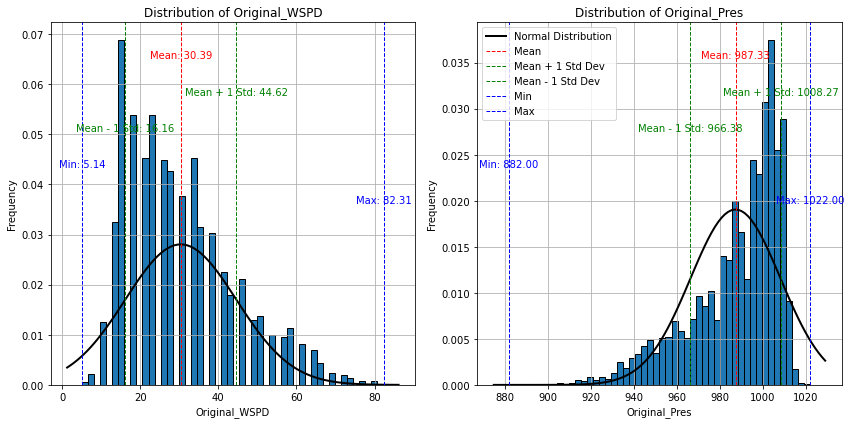

In [6]:
PNG = '/home/disk/orca/adaley17/MLGEO2024_TC_Tracks_Intensity/figures/'

plt.figure(figsize=(12, 6))

# Subplot for Original_WSPD
plt.subplot(1, 2, 1)
data_wspd = ai_ready_data['Vmax'].dropna()
data_wspd.hist(bins=50, edgecolor='black', density=True)
mean_wspd, std_wspd = data_wspd.mean(), data_wspd.std()
xmin_wspd, xmax_wspd = plt.xlim()
x_wspd = np.linspace(xmin_wspd, xmax_wspd, 100)
p_wspd = norm.pdf(x_wspd, mean_wspd, std_wspd)
plt.plot(x_wspd, p_wspd, 'k', linewidth=2)
plt.axvline(mean_wspd, color='r', linestyle='dashed', linewidth=1)
plt.axvline(mean_wspd + std_wspd, color='g', linestyle='dashed', linewidth=1)
plt.axvline(mean_wspd - std_wspd, color='g', linestyle='dashed', linewidth=1)
plt.axvline(data_wspd.min(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(data_wspd.max(), color='b', linestyle='dashed', linewidth=1)
plt.text(mean_wspd, plt.ylim()[1]*0.9, f'Mean: {mean_wspd:.2f}', color='r', ha='center')
plt.text(mean_wspd + std_wspd, plt.ylim()[1]*0.8, f'Mean + 1 Std: {mean_wspd + std_wspd:.2f}', color='g', ha='center')
plt.text(mean_wspd - std_wspd, plt.ylim()[1]*0.7, f'Mean - 1 Std: {mean_wspd - std_wspd:.2f}', color='g', ha='center')
plt.text(data_wspd.min(), plt.ylim()[1]*0.6, f'Min: {data_wspd.min():.2f}', color='b', ha='center')
plt.text(data_wspd.max(), plt.ylim()[1]*0.5, f'Max: {data_wspd.max():.2f}', color='b', ha='center')
plt.xlabel('Original_WSPD')
plt.ylabel('Frequency')
plt.title('Distribution of Original_WSPD')

# Subplot for Original_Pres
plt.subplot(1, 2, 2)
data_pres = ai_ready_data['MSLP'].dropna()
data_pres.hist(bins=50, edgecolor='black', density=True)
mean_pres, std_pres = data_pres.mean(), data_pres.std()
xmin_pres, xmax_pres = plt.xlim()
x_pres = np.linspace(xmin_pres, xmax_pres, 100)
p_pres = norm.pdf(x_pres, mean_pres, std_pres)
plt.plot(x_pres, p_pres, 'k', linewidth=2)
plt.axvline(mean_pres, color='r', linestyle='dashed', linewidth=1)
plt.axvline(mean_pres + std_pres, color='g', linestyle='dashed', linewidth=1)
plt.axvline(mean_pres - std_pres, color='g', linestyle='dashed', linewidth=1)
plt.axvline(data_pres.min(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(data_pres.max(), color='b', linestyle='dashed', linewidth=1)
plt.text(mean_pres, plt.ylim()[1]*0.9, f'Mean: {mean_pres:.2f}', color='r', ha='center')
plt.text(mean_pres + std_pres, plt.ylim()[1]*0.8, f'Mean + 1 Std: {mean_pres + std_pres:.2f}', color='g', ha='center')
plt.text(mean_pres - std_pres, plt.ylim()[1]*0.7, f'Mean - 1 Std: {mean_pres - std_pres:.2f}', color='g', ha='center')
plt.text(data_pres.min(), plt.ylim()[1]*0.6, f'Min: {data_pres.min():.2f}', color='b', ha='center')
plt.text(data_pres.max(), plt.ylim()[1]*0.5, f'Max: {data_pres.max():.2f}', color='b', ha='center')
plt.xlabel('Original_Pres')
plt.ylabel('Frequency')
plt.title('Distribution of Original_Pres')
plt.legend(['Normal Distribution', 'Mean', 'Mean + 1 Std Dev', 'Mean - 1 Std Dev', 'Min', 'Max'])

plt.tight_layout()

plt.savefig(PNG + 'Original_WSPD_Pres_Distribution.png', dpi=300, bbox_inches='tight',
            facecolor='w', edgecolor='w', transparent=False)

plt.show()

### Forecasted Wind Speed and Minimum Sea Level Pressure, SST, Vertival Velocity, Vertical Wind Shear and Mid-level Relative Humidity

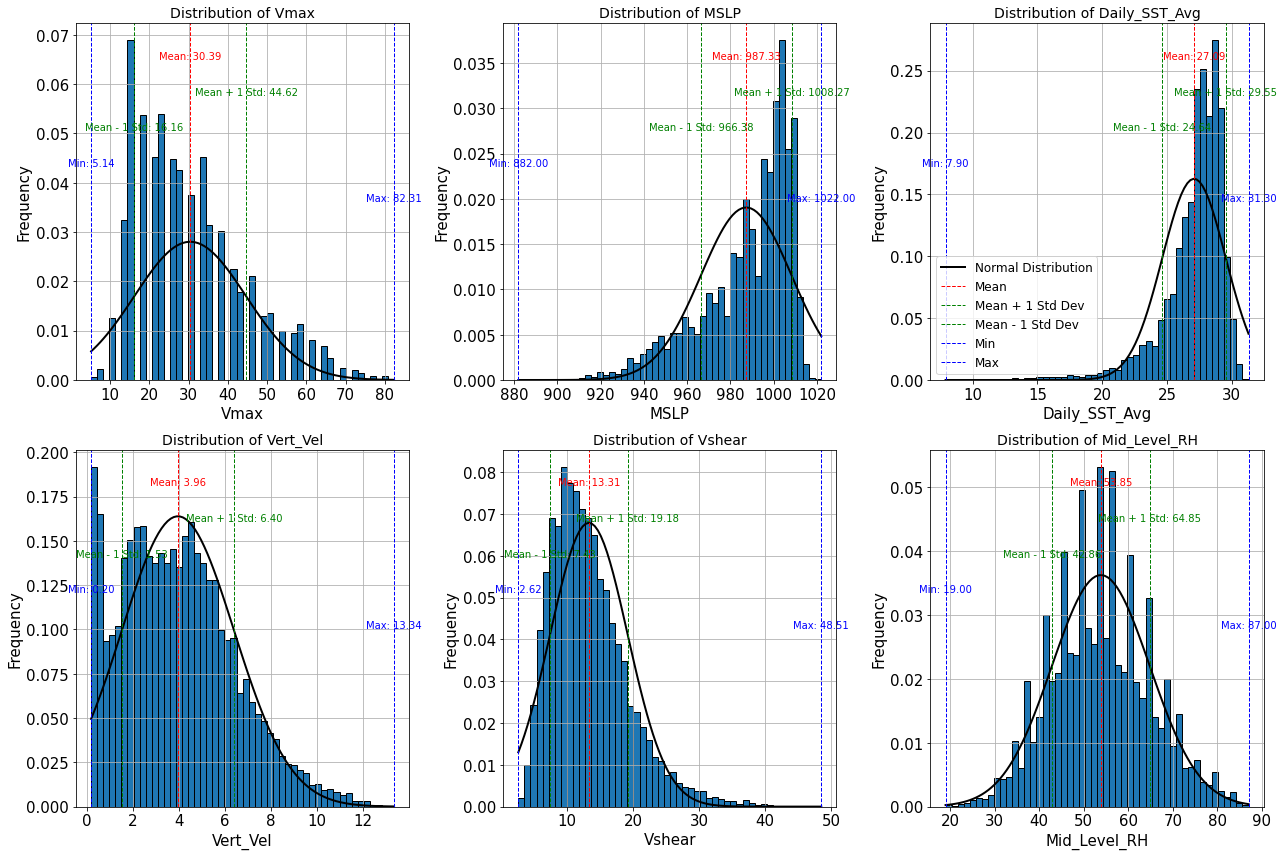

In [8]:
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt

# Define the columns and titles for the subplots
columns = ['Vmax', 'MSLP', 'Daily_SST_Avg', 'Vert_Vel', 'Vshear', 'Mid_Level_RH']
titles = ['Distribution of Vmax', 'Distribution of MSLP', 'Distribution of Daily_SST_Avg', 
          'Distribution of Vert_Vel', 'Distribution of Vshear', 'Distribution of Mid_Level_RH']
# xmins = [xmin_vmax, xmin_mslp, xmin_sst, xmin_vert_vel, xmin_vshear, xmin_rh]
# xmaxs = [xmax_vmax, xmax_mslp, xmax_sst, xmax_vert_vel, xmax_vshear, xmax_rh]
# means = [mean_vmax, mean_mslp, mean_sst, mean_vert_vel, mean_vshear, mean_rh]
# stds = [std_vmax, std_mslp, std_sst, std_vert_vel, std_vshear, std_rh]
# Compute the required statistics
mean_vmax, std_vmax = ai_ready_data['Vmax'].mean(), ai_ready_data['Vmax'].std()
mean_mslp, std_mslp = ai_ready_data['MSLP'].mean(), ai_ready_data['MSLP'].std()
mean_sst, std_sst = ai_ready_data['Daily_SST_Avg'].mean(), ai_ready_data['Daily_SST_Avg'].std()
mean_vert_vel, std_vert_vel = ai_ready_data['Vert_Vel'].mean(), ai_ready_data['Vert_Vel'].std()
mean_vshear, std_vshear = ai_ready_data['Vshear'].mean(), ai_ready_data['Vshear'].std()
mean_rh, std_rh = ai_ready_data['Mid_Level_RH'].mean(), ai_ready_data['Mid_Level_RH'].std()

xmin_vmax, xmax_vmax = ai_ready_data['Vmax'].min(), ai_ready_data['Vmax'].max()
xmin_mslp, xmax_mslp = ai_ready_data['MSLP'].min(), ai_ready_data['MSLP'].max()
xmin_sst, xmax_sst = ai_ready_data['Daily_SST_Avg'].min(), ai_ready_data['Daily_SST_Avg'].max()
xmin_vert_vel, xmax_vert_vel = ai_ready_data['Vert_Vel'].min(), ai_ready_data['Vert_Vel'].max()
xmin_vshear, xmax_vshear = ai_ready_data['Vshear'].min(), ai_ready_data['Vshear'].max()
xmin_rh, xmax_rh = ai_ready_data['Mid_Level_RH'].min(), ai_ready_data['Mid_Level_RH'].max()
fontsize = 15
plt.figure(figsize=(18, 12))

means = [mean_vmax, mean_mslp, mean_sst, mean_vert_vel, mean_vshear, mean_rh]
stds = [std_vmax, std_mslp, std_sst, std_vert_vel, std_vshear, std_rh]
xmins = [xmin_vmax, xmin_mslp, xmin_sst, xmin_vert_vel, xmin_vshear, xmin_rh]
xmaxs = [xmax_vmax, xmax_mslp, xmax_sst, xmax_vert_vel, xmax_vshear, xmax_rh]

for i, col in enumerate(columns):
    plt.subplot(2, 3, i + 1)
    data = ai_ready_data[col].dropna()
    data.hist(bins=50, edgecolor='black', density=True)
    mean, std = means[i], stds[i]
    xmin, xmax = xmins[i], xmaxs[i]
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=1)
    plt.axvline(mean + std, color='g', linestyle='dashed', linewidth=1)
    plt.axvline(mean - std, color='g', linestyle='dashed', linewidth=1)
    plt.axvline(data.min(), color='b', linestyle='dashed', linewidth=1)
    plt.axvline(data.max(), color='b', linestyle='dashed', linewidth=1)
    plt.text(mean, plt.ylim()[1]*0.9, f'Mean: {mean:.2f}', color='r', ha='center')
    plt.text(mean + std, plt.ylim()[1]*0.8, f'Mean + 1 Std: {mean + std:.2f}', color='g', ha='center')
    plt.text(mean - std, plt.ylim()[1]*0.7, f'Mean - 1 Std: {mean - std:.2f}', color='g', ha='center')
    plt.text(data.min(), plt.ylim()[1]*0.6, f'Min: {data.min():.2f}', color='b', ha='center')
    plt.text(data.max(), plt.ylim()[1]*0.5, f'Max: {data.max():.2f}', color='b', ha='center')
    plt.xlabel(col, fontsize=fontsize)
    plt.ylabel('Frequency', fontsize=fontsize)
    plt.title(titles[i], fontsize=14)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)

    if i == 2:  # Add legend to the third subplot as an example
        plt.legend(['Normal Distribution', 'Mean', 'Mean + 1 Std Dev', 'Mean - 1 Std Dev', 'Min', 'Max'], 
                   loc='lower left', fontsize=12)

plt.tight_layout()

plt.savefig(PNG + 'All_Features_Distribution.png', dpi=300, bbox_inches='tight',
            facecolor='w', edgecolor='w', transparent=False)

plt.show()


## Investigating Correlarion

### Use a regular correlation first

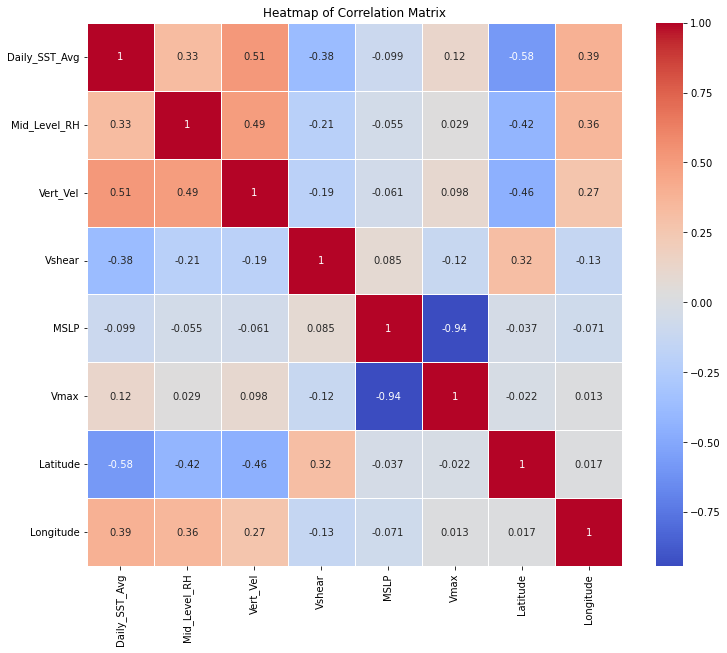

In [7]:
plt.figure(figsize=(12, 10))
correlation_matrix = ai_ready_data.drop(columns=['Times', 'Original_Times']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

There appears to be a weak correlation between the Daily SST average, Mid level Relative Humidity and the Vertical velocity. There is also a relationship between the MSLP and Vmax. The former relationship summarizes the effects in the secondary circulation (fluid goes in , up and out of the vortex) of a Tropical Cyclone. As the ocean gets warmer more convergence takes place which results in warm air rising quickly. As this warm air rises it cools thereby increasing the humidity. The latter relationship is expected since as the MSLP decreases the wind speed gets stronger.

### Using a pearson correlation

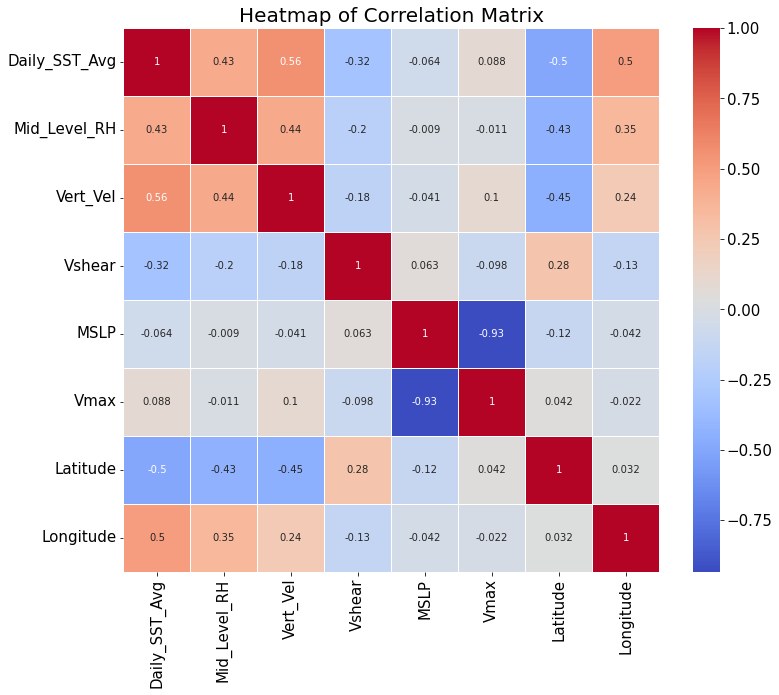

In [12]:
plt.figure(figsize=(12, 10))
correlation_matrix = ai_ready_data.drop(columns=['Times', 'Original_Times']).corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=15)

plt.savefig(PNG + 'Heatmap_of_Correlation_Matrix_Spearman.png', dpi=300, bbox_inches='tight',
            facecolor='w', edgecolor='w', transparent=False)

plt.show()

Similar relationships are identified using the pearson correlation